In [93]:
import pandas as pd
from copy import deepcopy
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')

In [94]:
figure3_outpath = '../../Figures/Figure 3/'
file_path = '../../Data/cleanedData/'

#read in cleaned combined data
NewDatasetCombine = pd.read_csv(file_path + 'CombinedCleanedDatasets.csv', low_memory=False)
NewDatasetCombine

,Target Gene Symbol,chromosome,sgRNA Sequence,sgRNA Context Sequence,sgRNA 'Cut' Position,Strand of Target,Strand of sgRNA,TSS Position,sgRNA 'Cut' Site TSS Offset,Phenotype scores-ave_Rep1_Rep2,...,condition,Domain,DataSet,zscoreRelativeNC_signed,Avg_LFC_signed,z_scored_avg_lfc,rs3ChenSeqScore,cellDomainDataSet,z_score,signed_zscore
0,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,A549,Kox1,InHouse,NaN,NaN,-0.398339,0.013999,A549_Kox1_InHouse,-0.398339,0.398339
1,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,A549,Zim3,InHouse,NaN,NaN,-0.841793,0.013999,A549_Zim3_InHouse,-0.841793,0.841793
2,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,HCT116,Zim3,InHouse,NaN,NaN,-0.992358,0.013999,HCT116_Zim3_InHouse,-0.992358,0.992358
3,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,A549,Kox1,InHouse,NaN,NaN,0.044728,-0.401549,A549_Kox1_InHouse,0.044728,-0.044728
4,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,A549,Zim3,InHouse,NaN,NaN,-0.190308,-0.401549,A549_Zim3_InHouse,-0.190308,0.190308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257411,WDR11,chr10,gctaggacctctactacaatgaa,GGCTAGGACCTCTACTACAATGAATGGGAG,120855890.0,+,+,120851363.0,4527.0,NaN,...,K562,Kox1,Gilbert,0.387317,0.354061,NaN,0.382810,K562_Kox1_Gilbert,0.387317,0.387317
257412,WDR11,chr10,gctaggacctctactacaatgaat,GCTAGGACCTCTACTACAATGAATGGGAGA,120855891.0,+,+,120851363.0,4528.0,NaN,...,K562,Kox1,Gilbert,-0.782858,-0.048063,NaN,0.654478,K562_Kox1_Gilbert,-0.782858,-0.782858
257413,WDR11,chr10,gtctttcatcaagtctgatgta,CAGTCTTTCATCAAGTCTGATGTAAGGTAT,120855971.0,+,+,120851363.0,4608.0,NaN,...,K562,Kox1,Gilbert,1.429277,0.712125,NaN,0.076554,K562_Kox1_Gilbert,1.429277,1.429277
257414,WDR11,chr10,gtaggtccaagtttcagtc,TTTATGTAGGTCCAAGTTTCAGTCTGGTAT,120856094.0,+,+,120851363.0,4731.0,NaN,...,K562,Kox1,Gilbert,0.553328,0.411110,NaN,0.717680,K562_Kox1_Gilbert,0.553328,0.553328


In [95]:
NewDatasetCombine['Orientation'] = NewDatasetCombine['Strand of Target'] + NewDatasetCombine['Strand of sgRNA']
NewDatasetCombine

,Target Gene Symbol,chromosome,sgRNA Sequence,sgRNA Context Sequence,sgRNA 'Cut' Position,Strand of Target,Strand of sgRNA,TSS Position,sgRNA 'Cut' Site TSS Offset,Phenotype scores-ave_Rep1_Rep2,...,Domain,DataSet,zscoreRelativeNC_signed,Avg_LFC_signed,z_scored_avg_lfc,rs3ChenSeqScore,cellDomainDataSet,z_score,signed_zscore,Orientation
0,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,Kox1,InHouse,NaN,NaN,-0.398339,0.013999,A549_Kox1_InHouse,-0.398339,0.398339,+-
1,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,Zim3,InHouse,NaN,NaN,-0.841793,0.013999,A549_Zim3_InHouse,-0.841793,0.841793,+-
2,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,Zim3,InHouse,NaN,NaN,-0.992358,0.013999,HCT116_Zim3_InHouse,-0.992358,0.992358,+-
3,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,Kox1,InHouse,NaN,NaN,0.044728,-0.401549,A549_Kox1_InHouse,0.044728,-0.044728,-+
4,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,Zim3,InHouse,NaN,NaN,-0.190308,-0.401549,A549_Zim3_InHouse,-0.190308,0.190308,-+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257411,WDR11,chr10,gctaggacctctactacaatgaa,GGCTAGGACCTCTACTACAATGAATGGGAG,120855890.0,+,+,120851363.0,4527.0,NaN,...,Kox1,Gilbert,0.387317,0.354061,NaN,0.382810,K562_Kox1_Gilbert,0.387317,0.387317,++
257412,WDR11,chr10,gctaggacctctactacaatgaat,GCTAGGACCTCTACTACAATGAATGGGAGA,120855891.0,+,+,120851363.0,4528.0,NaN,...,Kox1,Gilbert,-0.782858,-0.048063,NaN,0.654478,K562_Kox1_Gilbert,-0.782858,-0.782858,++
257413,WDR11,chr10,gtctttcatcaagtctgatgta,CAGTCTTTCATCAAGTCTGATGTAAGGTAT,120855971.0,+,+,120851363.0,4608.0,NaN,...,Kox1,Gilbert,1.429277,0.712125,NaN,0.076554,K562_Kox1_Gilbert,1.429277,1.429277,++
257414,WDR11,chr10,gtaggtccaagtttcagtc,TTTATGTAGGTCCAAGTTTCAGTCTGGTAT,120856094.0,+,+,120851363.0,4731.0,NaN,...,Kox1,Gilbert,0.553328,0.411110,NaN,0.717680,K562_Kox1_Gilbert,0.553328,0.553328,++


In [96]:
NewDatasetCombine_strand_avg = NewDatasetCombine.groupby(['Target Gene Symbol',
                                                          'sgRNA Context Sequence',
                                                          'Orientation','cellDomainDataSet'])['signed_zscore'].mean().reset_index()
NewDatasetCombine_strand_avg

,Target Gene Symbol,sgRNA Context Sequence,Orientation,cellDomainDataSet,signed_zscore
0,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,++,A549_Kox1_InHouse,-0.845642
1,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,++,A549_Zim3_InHouse,-0.909642
2,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,++,HCT116_Kox1_InHouse,4.863620
3,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,++,HCT116_Zim3_InHouse,3.580409
4,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,++,A549_Kox1_InHouse,0.998187
...,...,...,...,...,...
257411,ZNHIT6,TTTAATGGTTAACACAGATTAGGGTGGGTT,--,K562_Kox1_Nunez,0.324543
257412,ZNHIT6,TTTACGGCTCTGCGGAGGCCCTGCCGGATT,-+,K562_Kox1_Nunez,0.245263
257413,ZNHIT6,TTTAGTGGTAAAAGAAGCGAAGGTGGGTGA,--,K562_Kox1_Nunez,0.605250
257414,ZNHIT6,TTTCTGGAGTCAGACGGCGTTCGCGGGGGT,--,K562_Kox1_Nunez,0.953249


In [97]:
def mann_whitney_u_per_gene(df,dataset_col = 'cellDomainDataSet'):
    results = []
    
    # Group by gene
    grouped = df.groupby(['Target Gene Symbol',dataset_col])
    
    for gene_dataset, group in grouped:
        Orientation = group['Orientation'].unique()
        
        if len(Orientation) == 2:
            # Extract metrics for both orientations
            metrics_Orientation1 = group[group['Orientation'] == Orientation[0]]['signed_zscore']
            metrics_Orientation2 = group[group['Orientation'] == Orientation[1]]['signed_zscore']
            if (len(metrics_Orientation1) >= 10) & (len(metrics_Orientation2) >= 10):
                # Perform Mann-Whitney U test
                stat, p_value = mannwhitneyu(metrics_Orientation1, 
                                             metrics_Orientation2, 
                                             alternative='two-sided')
                results.append({'gene': gene_dataset[0], 
                                dataset_col: gene_dataset[1],
                                'metrics_Orientation1': Orientation[0], 
                                'metrics_Orientation2': Orientation[1], 
                                'p_value': p_value})
            else:
                print(f'{gene_dataset} does not satisify the sample size')
        else:
            results.append({'gene': gene_dataset[0], dataset_col: gene_dataset[1], 'metrics_Orientation1': None, 
                            'metrics_Orientation2': None, 'p_value': None})
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    results_df['-log10(p_value)'] = -np.log10(results_df['p_value'])
    return results_df

In [98]:
mwu_results =  mann_whitney_u_per_gene(NewDatasetCombine_strand_avg)
mwu_results

('NIP7', 'K562_Kox1_Nunez') does not satisify the sample size


,gene,cellDomainDataSet,metrics_Orientation1,metrics_Orientation2,p_value,-log10(p_value)
0,AATF,A549_Kox1_InHouse,++,+-,0.963501,0.016148
1,AATF,A549_Zim3_InHouse,++,+-,0.688961,0.161805
2,AATF,HCT116_Kox1_InHouse,++,+-,0.076956,1.113757
3,AATF,HCT116_Zim3_InHouse,++,+-,0.035629,1.448199
4,ACTR6,K562_Kox1_Nunez,+-,++,0.854082,0.068500
...,...,...,...,...,...,...
942,ZNF131,HCT116_Kox1_InHouse,++,+-,0.676748,0.169573
943,ZNF131,HCT116_Zim3_InHouse,++,+-,0.463550,0.333903
944,ZNF574,K562_Kox1_Nunez,+-,++,0.513570,0.289401
945,ZNF830,K562_Kox1_Nunez,+-,++,0.503835,0.297711


In [99]:
def categorize_pval(df, col= '-log10(p_value)'):
    new_df = df.copy()
    conditions  = [ new_df[col] < 1, 
                   (new_df[col] >= 1) & (new_df[col]< 2), 
                   (new_df[col] >= 2) & (new_df[col]< 3), 
                   (new_df[col] >= 3) & (new_df[col]< 4),
                  new_df[col] >= 4]
    choices     = [ "< 1", '[1,2)', '[2,3)', '[3,4)', '>= 4' ]
    new_df["-log10(pval) bins"] = np.select(conditions, choices, default=np.nan)
    return new_df

In [100]:
mwu_results = categorize_pval(mwu_results)
mwu_results

,gene,cellDomainDataSet,metrics_Orientation1,metrics_Orientation2,p_value,-log10(p_value),-log10(pval) bins
0,AATF,A549_Kox1_InHouse,++,+-,0.963501,0.016148,< 1
1,AATF,A549_Zim3_InHouse,++,+-,0.688961,0.161805,< 1
2,AATF,HCT116_Kox1_InHouse,++,+-,0.076956,1.113757,"[1,2)"
3,AATF,HCT116_Zim3_InHouse,++,+-,0.035629,1.448199,"[1,2)"
4,ACTR6,K562_Kox1_Nunez,+-,++,0.854082,0.068500,< 1
...,...,...,...,...,...,...,...
942,ZNF131,HCT116_Kox1_InHouse,++,+-,0.676748,0.169573,< 1
943,ZNF131,HCT116_Zim3_InHouse,++,+-,0.463550,0.333903,< 1
944,ZNF574,K562_Kox1_Nunez,+-,++,0.513570,0.289401,< 1
945,ZNF830,K562_Kox1_Nunez,+-,++,0.503835,0.297711,< 1


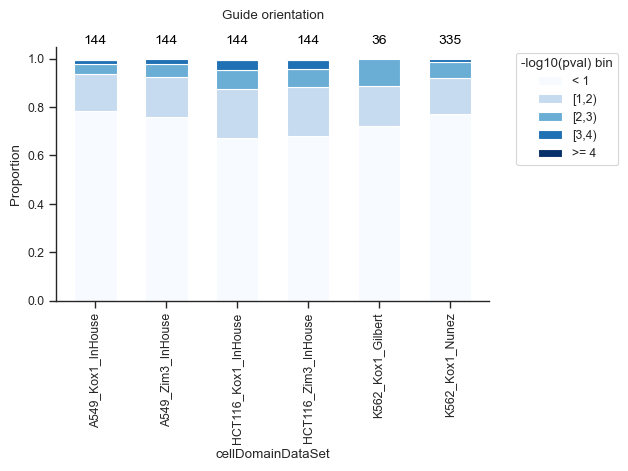

In [101]:
grouped_df = mwu_results.groupby(['-log10(pval) bins', 'cellDomainDataSet'])['gene'].nunique().reset_index()
grouped_df['total_gene'] = grouped_df.groupby('cellDomainDataSet')['gene'].transform('sum')
grouped_df['prop_in_bin'] = grouped_df['gene']/grouped_df['total_gene']
grouped_df_pivoted = grouped_df.pivot(index = 'cellDomainDataSet', columns = '-log10(pval) bins', values = 'prop_in_bin')
grouped_df_pivoted = grouped_df_pivoted[['< 1','[1,2)',  '[2,3)','[3,4)','>= 4']]

grouped_df_pivoted.plot(kind='bar', stacked=True,  width=0.6, cmap = 'Blues')

# Add percentages to the bars and the total count
num_gene_dataset = grouped_df[['cellDomainDataSet','total_gene']].drop_duplicates()
for i in range(len(num_gene_dataset)):
    dataset = num_gene_dataset.iloc[i]['cellDomainDataSet']
    num_gene = num_gene_dataset.iloc[i]['total_gene']
    plt.text(i, 1.05, f'{int(num_gene)}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')


plt.ylabel('Proportion')
plt.xlabel('cellDomainDataSet')
plt.xticks(rotation=90)
plt.title('Guide orientation',pad=20)
plt.legend(title='-log10(pval) bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
sns.despine()

In [102]:
NewDatasetCombine_strand_avg = NewDatasetCombine.groupby(['Target Gene Symbol',
                                                          'sgRNA Context Sequence',
                                                          'Orientation','DataSet'])['signed_zscore'].mean().reset_index()
NewDatasetCombine_strand_avg

,Target Gene Symbol,sgRNA Context Sequence,Orientation,DataSet,signed_zscore
0,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,++,InHouse,1.672186
1,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,++,InHouse,3.228927
2,AATF,AAAGAAGCCGAAGCCCTCCTCCCGAGGCCG,+-,InHouse,5.333442
3,AATF,AAAGCATAGCGTAGCCGTGGCCCACGGTGG,+-,InHouse,1.189932
4,AATF,AAAGCGATTGTGTCTTTCCGTGTGCGGGGT,++,InHouse,-0.027726
...,...,...,...,...,...
129876,ZNHIT6,TTTAATGGTTAACACAGATTAGGGTGGGTT,--,Nunez,0.324543
129877,ZNHIT6,TTTACGGCTCTGCGGAGGCCCTGCCGGATT,-+,Nunez,0.245263
129878,ZNHIT6,TTTAGTGGTAAAAGAAGCGAAGGTGGGTGA,--,Nunez,0.605250
129879,ZNHIT6,TTTCTGGAGTCAGACGGCGTTCGCGGGGGT,--,Nunez,0.953249


In [103]:
mwu_results =  mann_whitney_u_per_gene(NewDatasetCombine_strand_avg, dataset_col = 'DataSet')
mwu_results = categorize_pval(mwu_results)
mwu_results['-log10(pval) bins'].value_counts()

('NIP7', 'Nunez') does not satisify the sample size


< 1      385
[1,2)     81
[2,3)     39
[3,4)     10
Name: -log10(pval) bins, dtype: int64

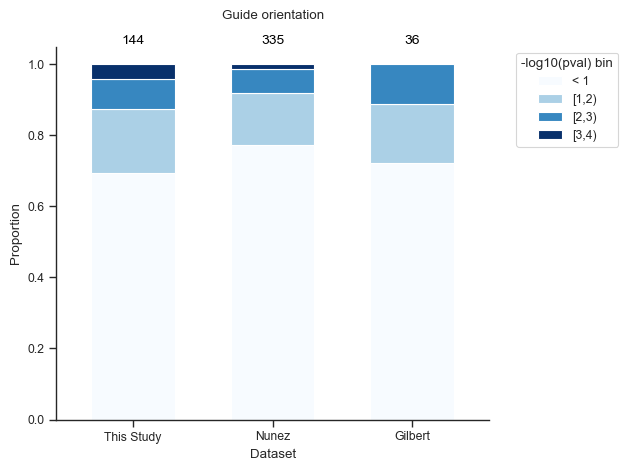

In [104]:
grouped_df = mwu_results.groupby(['-log10(pval) bins', 'DataSet'])['gene'].nunique().reset_index()
grouped_df['DataSet'] = grouped_df['DataSet'].replace('InHouse','This Study')
grouped_df['total_gene'] = grouped_df.groupby('DataSet')['gene'].transform('sum')
grouped_df['prop_in_bin'] = grouped_df['gene']/grouped_df['total_gene']
grouped_df_pivoted = grouped_df.pivot(index = 'DataSet', columns = '-log10(pval) bins', values = 'prop_in_bin')
grouped_df_pivoted = grouped_df_pivoted[['< 1','[1,2)',  '[2,3)','[3,4)']]
grouped_df_pivoted = grouped_df_pivoted.loc[['This Study','Nunez','Gilbert']]

grouped_df_pivoted.plot(kind='bar', stacked=True,  width=0.6, cmap = 'Blues')

#annotate bars with total count of genes
num_gene_dataset = grouped_df[['DataSet','total_gene']].drop_duplicates().sort_values(by = 'DataSet',ascending=False)
for i in range(len(num_gene_dataset)):
    dataset = num_gene_dataset.iloc[i]['DataSet']
    num_gene = num_gene_dataset.iloc[i]['total_gene']
    plt.text(i, 1.05, f'{int(num_gene)}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')


plt.ylabel('Proportion')
plt.xlabel('Dataset')
plt.xticks(rotation=0)
plt.title('Guide orientation',pad=20)
plt.legend(title='-log10(pval) bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
sns.despine()

gpp.savefig(figure3_outpath + "guide_orientation_inhouse_averaged.pdf", dpi=300, bbox_inches='tight')